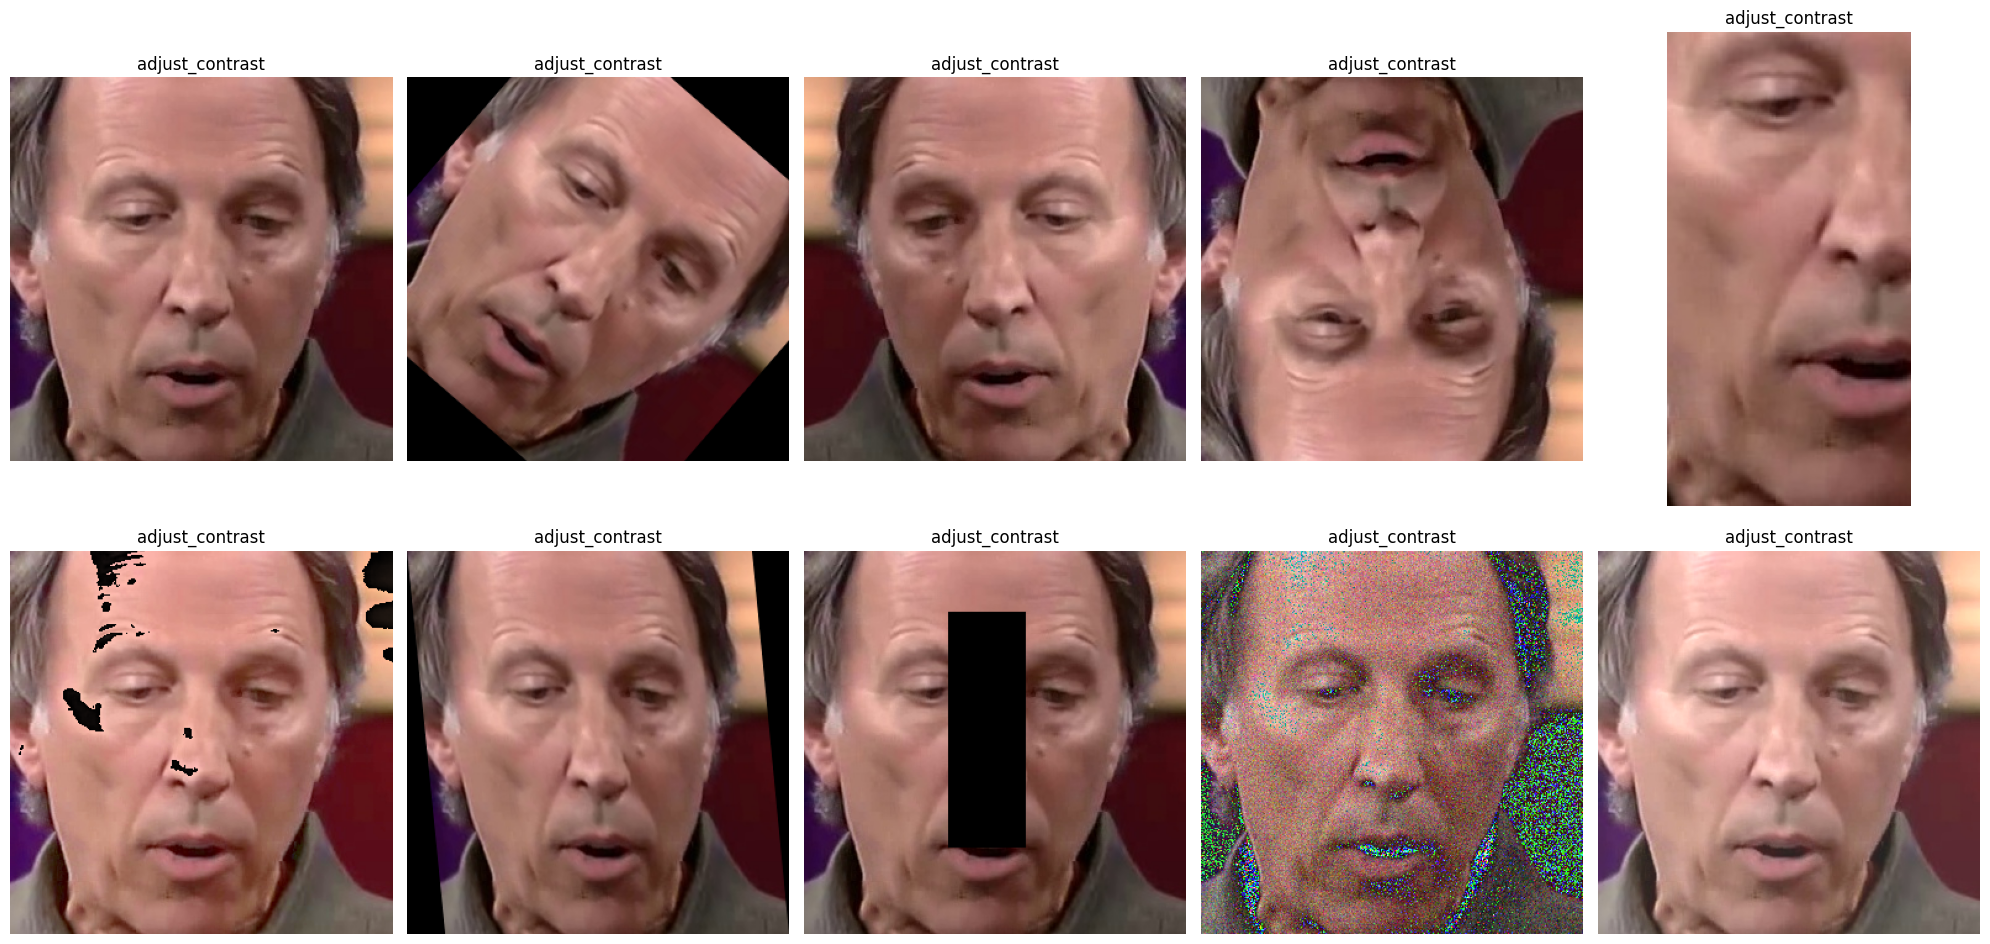

In [18]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from megatron.transformations import TRANSFORMATIONS

original_image = plt.imread("./../assets/test_sample_(311, 310, 3).jpeg")
transformations = []
for i, (func, gen_kwargs) in enumerate(TRANSFORMATIONS):
    kwargs = gen_kwargs()
    transformed_image = func(original_image, **kwargs)
    transformations.append(transformed_image)

gs = gridspec.GridSpec(2, len(transformations) // 2)  

fig, axes = plt.subplots(2, len(transformations) // 2, figsize=(20, 10), gridspec_kw={'height_ratios': [1, 1]}) 

for i, transformed_image in enumerate(transformations):
    row, col = divmod(i, len(transformations) // 2)
    axes[row, col].imshow(transformed_image, cmap='gray') 
    axes[row, col].set_title(func.__name__)
    axes[row, col].axis('off')  


plt.subplots_adjust(hspace=0.05, wspace=0.05)  
plt.tight_layout()
plt.show()


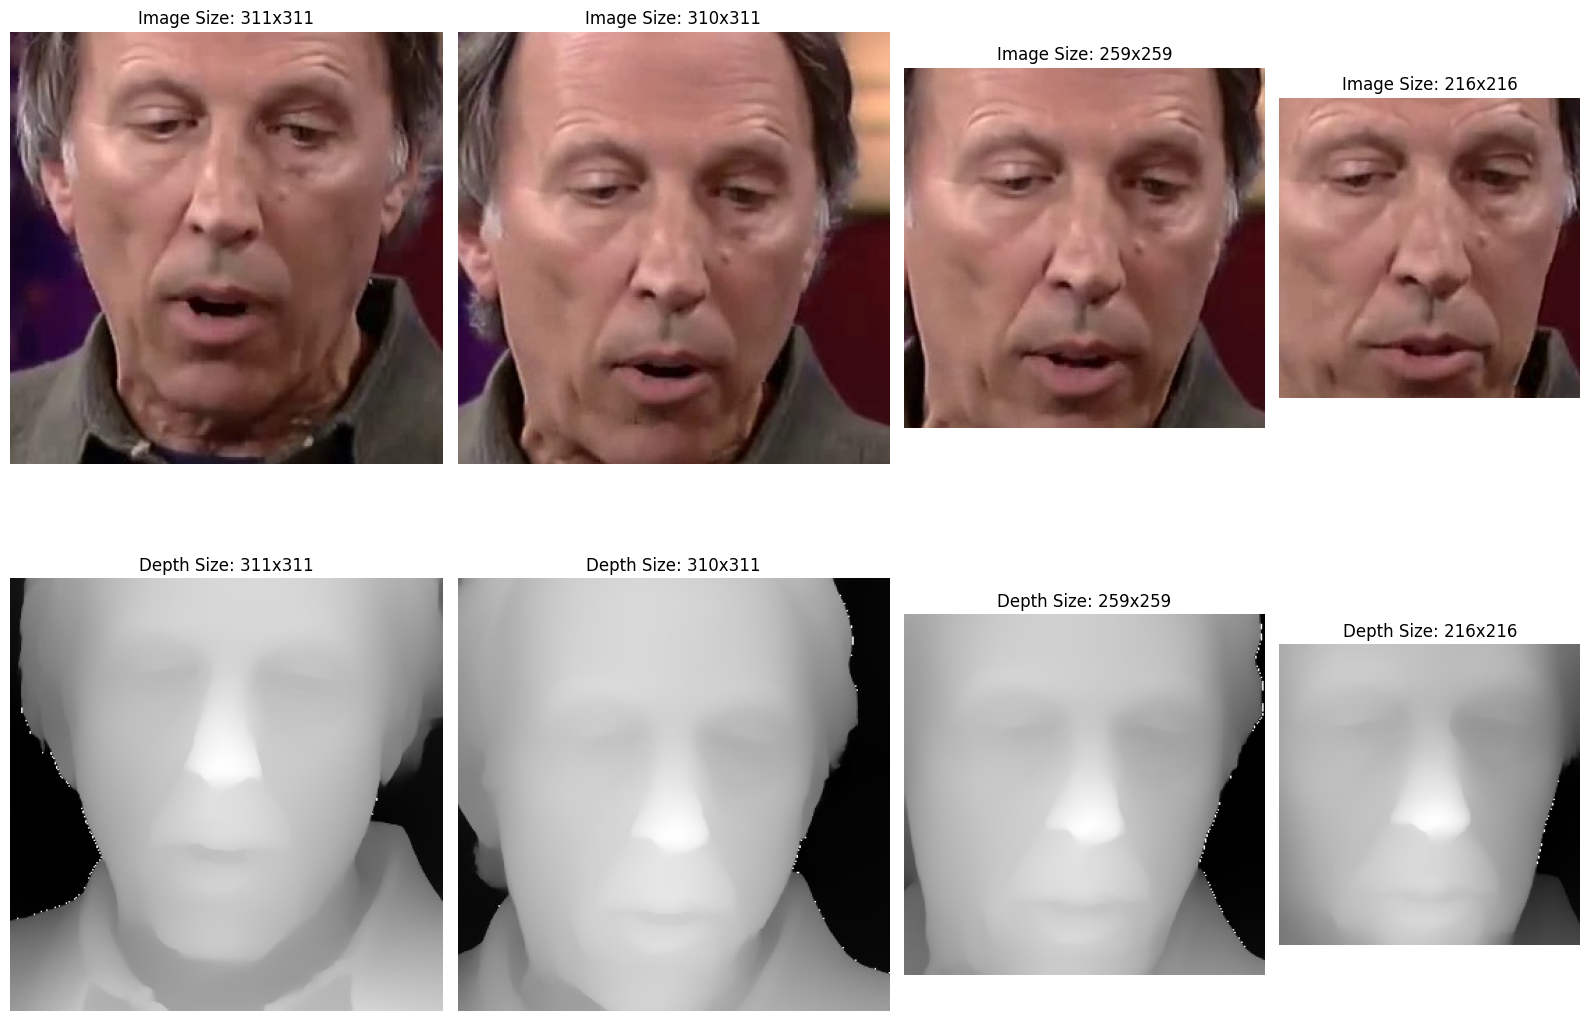

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import gridspec

image_paths = [
    ".\\..\\assets\\test_sample_(311, 311, 3).jpeg",
    ".\\..\\assets\\test_sample_(311, 310, 3).jpeg",
    ".\\..\\assets\\test_sample_(259, 259, 3).jpeg",
    ".\\..\\assets\\test_sample_(216, 216, 3).jpeg"
]
depth_paths = [
    ".\\..\\assets\\test_sample_depth_(311, 311, 3).jpeg",
    ".\\..\\assets\\test_sample_depth_(311, 310, 3).jpeg",
    ".\\..\\assets\\test_sample_depth_(259, 259, 3).jpeg",
    ".\\..\\assets\\test_sample_depth_(216, 216, 3).jpeg"
]

images = [Image.open(path) for path in image_paths]
depth_images = [Image.open(path) for path in depth_paths]
sizes = [img.size for img in images] 

fig = plt.figure(figsize=(16, 12))  

gs = gridspec.GridSpec(2, len(images), width_ratios=[w for w, h in sizes])

for i, img in enumerate(images):
    ax = fig.add_subplot(gs[0, i])
    ax.imshow(img)
    ax.set_title(f"Image Size: {img.size[0]}x{img.size[1]}")
    ax.axis('off')


for i, img in enumerate(depth_images):
    ax = fig.add_subplot(gs[1, i]) 
    ax.imshow(img)
    ax.set_title(f"Depth Size: {img.size[0]}x{img.size[1]}")
    ax.axis('off')  

plt.tight_layout()
plt.show()


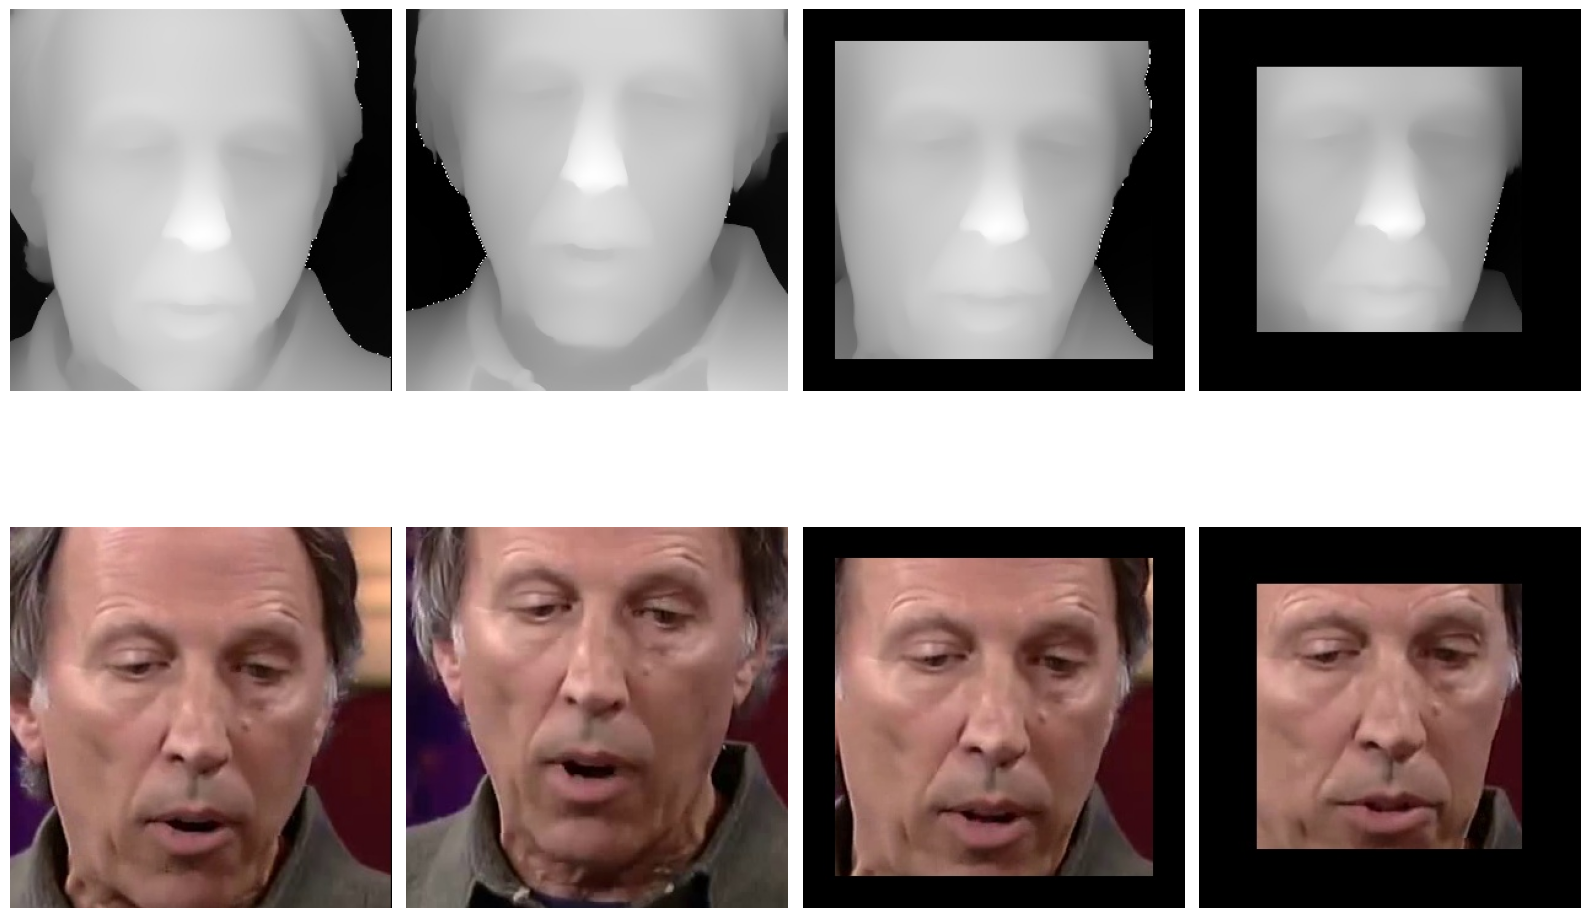

In [26]:
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import gridspec


image_paths = [
    ".\\..\\assets\\test_sample_depth_padded_3.jpeg",
    ".\\..\\assets\\test_sample_depth_padded_2.jpeg",
    ".\\..\\assets\\test_sample_depth_padded_0.jpeg",
    ".\\..\\assets\\test_sample_depth_padded_1.jpeg",
]
depth_paths = [
    ".\\..\\assets\\test_sample_rgb_padded_3.jpeg",
    ".\\..\\assets\\test_sample_rgb_padded_2.jpeg",
    ".\\..\\assets\\test_sample_rgb_padded_0.jpeg",
    ".\\..\\assets\\test_sample_rgb_padded_1.jpeg",
]

images = [Image.open(path) for path in image_paths]
depth_images = [Image.open(path) for path in depth_paths]
sizes = [img.size for img in images]  

fig = plt.figure(figsize=(16, 12)) 

gs = gridspec.GridSpec(2, len(images), width_ratios=[w for w, h in sizes])

for i, img in enumerate(images):
    ax = fig.add_subplot(gs[0, i])
    ax.imshow(img)
    ax.axis('off')  


for i, img in enumerate(depth_images):
    ax = fig.add_subplot(gs[1, i])  
    ax.imshow(img)
    ax.axis('off')  

plt.tight_layout()
plt.show()


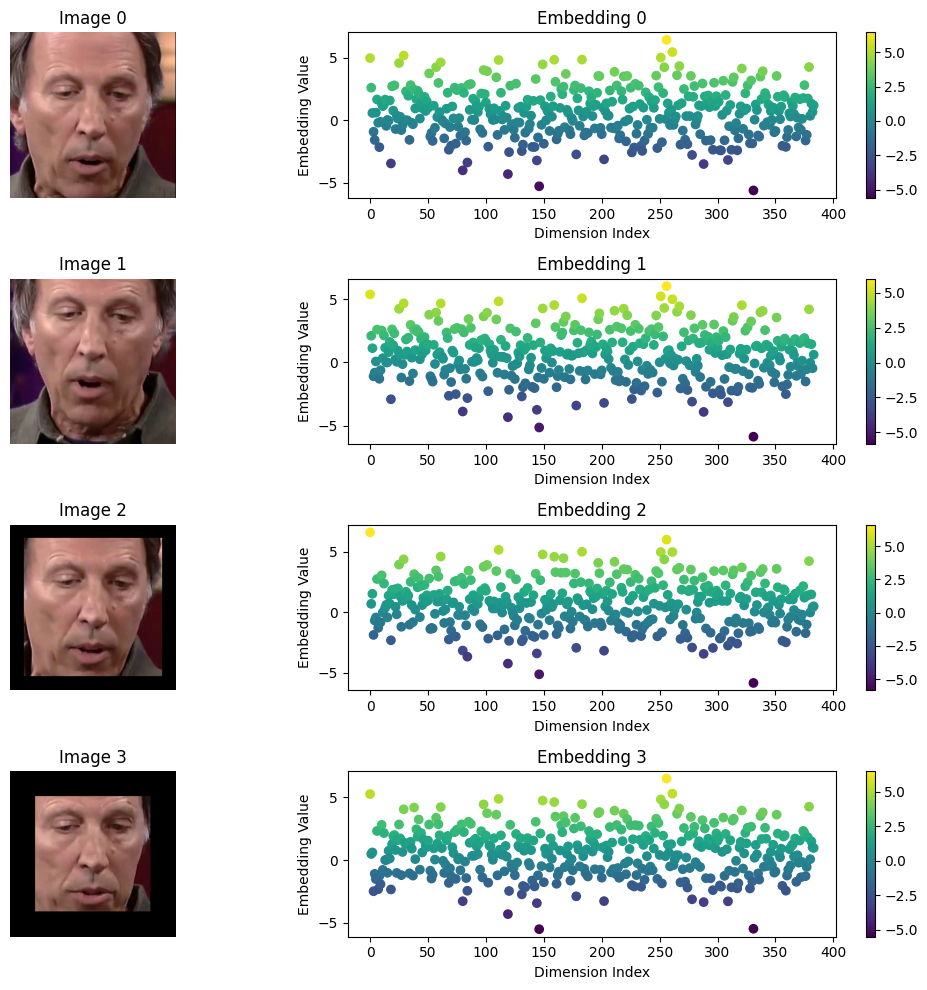

In [38]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from PIL import Image

# Load images and embeddings
rgb_paths = [
    ".\\..\\assets\\test_sample_rgb_padded_3.jpeg",
    ".\\..\\assets\\test_sample_rgb_padded_2.jpeg",
    ".\\..\\assets\\test_sample_rgb_padded_0.jpeg",
    ".\\..\\assets\\test_sample_rgb_padded_1.jpeg",
]
embeddings = torch.load("./../assets/test_sample_embeddings.pth", weights_only=True).to("cpu")


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))  
for i in range(4):
    img = Image.open(rgb_paths[i])
    axes[i][0].imshow(img)
    axes[i][0].axis('off')
    axes[i][0].set_title(f"Image {i}")
    embedding = embeddings[i].numpy()
    x_values = np.arange(len(embedding))
    y_values = embedding
    colors = embedding

    scatter = axes[i][1].scatter(x_values, y_values, c=colors, cmap='viridis')
    axes[i][1].set_title(f"Embedding {i}")
    fig.colorbar(scatter, ax=axes[i][1], orientation='vertical')

    axes[i][1].set_xlabel('Dimension Index')
    axes[i][1].set_ylabel('Embedding Value')

plt.tight_layout()
plt.show()
